In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [232]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df=pd.read_csv(url, names=cols)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [233]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [236]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [238]:
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [240]:
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [244]:
print("Decision Tree - Training Accuracy:",dt_clf.score(X_train,y_train))
print("Decision Tree - Testing Accuracy:",dt_clf.score(X_test,y_test))

print("Random forest - Training Accuracy:",rf_clf.score(X_train,y_train))
print("Random forest - Testing Accuracy:",rf_clf.score(X_test,y_test))

Decision Tree - Training Accuracy: 0.7768729641693811
Decision Tree - Testing Accuracy: 0.7532467532467533
Random forest - Training Accuracy: 1.0
Random forest - Testing Accuracy: 0.8441558441558441


In [252]:
importances=rf_clf.feature_importances_
feat_importance=pd.Series(importances,index=X.columns).sort_values(ascending=False)

In [254]:
print(feat_importance)

Glucose                     0.269051
BMI                         0.176614
Age                         0.121596
DiabetesPedigreeFunction    0.116971
BloodPressure               0.089793
Pregnancies                 0.083586
Insulin                     0.071768
SkinThickness               0.070621
dtype: float64


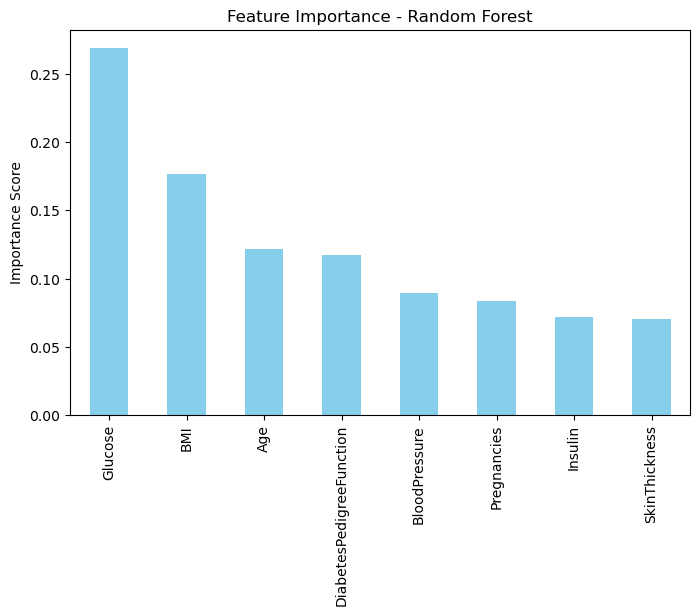

In [256]:
plt.figure(figsize=(8,5))
feat_importance.plot(kind='bar',color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()